# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

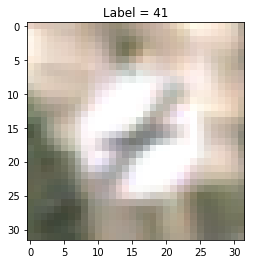

In [4]:
#Visualize a random traffic sign
#n = np.random.randint(n_train)
n = 31
plt.title("Label = " + str(y_train[n]))
plt.imshow(X_train[n])

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]
2
0


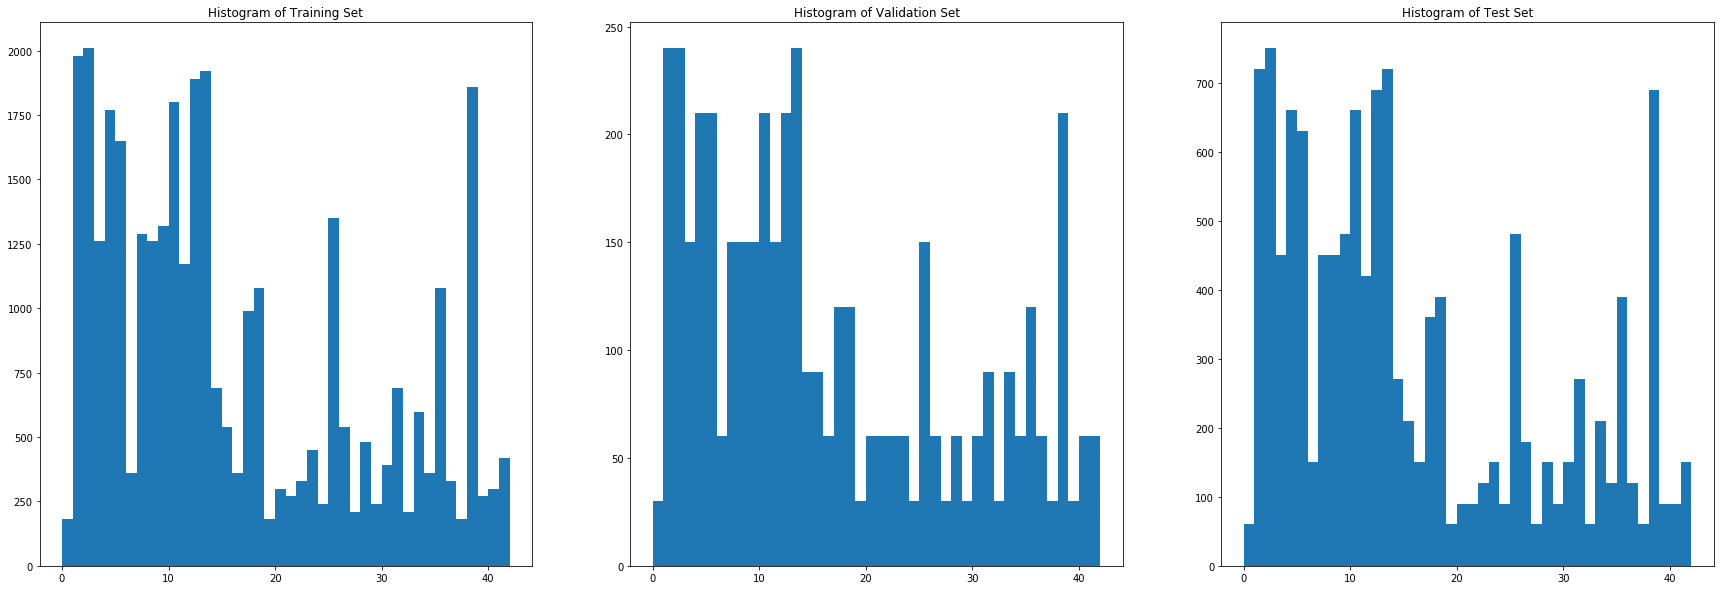

In [12]:
train_counts = [sum(y_train == label) for label in range(n_classes)]
valid_counts = [sum(y_valid == label) for label in range(n_classes)]
test_counts = [sum(y_test == label) for label in range(n_classes)]

print(train_counts)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3 ,figsize=(30, 10))
ax1.hist(y_train, bins=range(0, n_classes))
ax1.set_title('Histogram of Training Set')
ax2.hist(y_valid, bins=range(0, n_classes))
ax2.set_title('Histogram of Validation Set')
ax3.hist(y_test, bins=range(0, n_classes))
ax3.set_title('Histogram of Test Set')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [17]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#Shuffle the training data
from sklearn.utils import shuffle
#X_train, y_train = shuffle(X_train, y_train)

In [18]:
import cv2
#Preprocess function
def preprocess(img_list):
    preprocessed_img_list = []
    for img in img_list:
        #grayscale
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        #histogram equalization
        img = cv2.equalizeHist(img)
        #img[:,:,2] = cv2.equalizeHist(img[:,:,2])
        #img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
        #img = np.asarray(img)
        #normalize
        img = img[:, :, np.newaxis]
        img = np.divide(img,128)
        #img = np.subtract(img, np.mean(img))
        img[:,:,0] = np.subtract(img[:,:,0],np.mean(img[:,:,0]))
        #img[:,:,1] = np.subtract(img[:,:,1],np.mean(img[:,:,1]))
        #img[:,:,2] = np.subtract(img[:,:,2],np.mean(img[:,:,2]))
        preprocessed_img_list.append(img)
    return preprocessed_img_list

X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

(32, 32, 1)

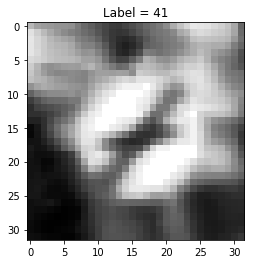

In [19]:
#Visualize a random traffic sign after normalization
#n = np.random.randint(n_train)
#print(n)
n = 31

plt.title("Label = " + str(y_train[n]))
plt.imshow(X_train[n].squeeze(), cmap="gray")
np.shape(X_train[n])

### Model Architecture

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [21]:
def LeNet(x):        
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [22]:
def DeepLeNet(x):
    '''
    A modified version of LeNet architecture with the following modifications:
    -More feature maps
    -5x5 and 3x3 kernels
    -Leaky ReLu activation functions
    -Padding changed to SAME
    -An additional convolutional layer 
    -Dropout layers to prevent overfitting
    '''
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # Leaky ReLu Activation.
    #conv1 = tf.nn.relu(conv1)
    conv2 = tf.maximum(0.2*conv1, conv1)
    
    # Dropout
    conv1 = tf.nn.dropout(conv1, 0.66)

    # Pooling. Input = 32x32x16. Output = 16x16x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Output = 16x16x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # Activation.
    #conv2 = tf.nn.relu(conv2)
    conv2 = tf.maximum(0.2*conv2, conv2)
    
    # Dropout
    conv2 = tf.nn.dropout(conv2, 0.66)

    # Pooling. Input = 16x16x32. Output = 8x8x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 3: Convolutions. Output = 8x8x64
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
   
    # Activation
    #conv3 = tf.nn.relu(conv3)
    conv3 = tf.maximum(0.2*conv3, conv3)
    
    # Dropout
    conv3 = tf.nn.dropout(conv3,0.66)
    
    # Pooling. Input = 8x8x64. Output = 4x4x64
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Flatten. Input = 4x4x32. Output = 1024.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 1024. Output = 128.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 128), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(128))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    #fc1    = tf.nn.relu(fc1)
    fc1 = tf.maximum(0.2*fc1, fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, 0.66)

    # Layer 5: Fully Connected. Input = 128. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(128, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    #fc2    = tf.nn.relu(fc2)
    fc2 = tf.maximum(0.2*fc2, fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, 0.66)

    # Layer 6: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [42]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#Set up features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [43]:
#Training/Validation Pipeline LeNet
rate = 0.0005
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [44]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [45]:
EPOCHS = 300
BATCH_SIZE = 256
validation_losses_LeNet = []
validation_accuracy_LeNet = []
train_accuracy_LeNet = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_loss = sess.run(loss_operation, feed_dict={x: X_valid, y: y_valid})
        validation_losses_LeNet.append(validation_loss)
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_LeNet.append(validation_accuracy)
        train_accuracy = evaluate(X_train, y_train)
        train_accuracy_LeNet.append(train_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print()
        
    saver.save(sess, './lenet.ckpt')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.614
Validation Accuracy = 0.579
Validation Loss = 1.537

EPOCH 2 ...
Training Accuracy = 0.805
Validation Accuracy = 0.746
Validation Loss = 0.888

EPOCH 3 ...
Training Accuracy = 0.866
Validation Accuracy = 0.807
Validation Loss = 0.685

EPOCH 4 ...
Training Accuracy = 0.895
Validation Accuracy = 0.831
Validation Loss = 0.596

EPOCH 5 ...
Training Accuracy = 0.920
Validation Accuracy = 0.857
Validation Loss = 0.518

EPOCH 6 ...
Training Accuracy = 0.927
Validation Accuracy = 0.861
Validation Loss = 0.495

EPOCH 7 ...
Training Accuracy = 0.948
Validation Accuracy = 0.867
Validation Loss = 0.467

EPOCH 8 ...
Training Accuracy = 0.952
Validation Accuracy = 0.870
Validation Loss = 0.449

EPOCH 9 ...
Training Accuracy = 0.962
Validation Accuracy = 0.885
Validation Loss = 0.427

EPOCH 10 ...
Training Accuracy = 0.966
Validation Accuracy = 0.883
Validation Loss = 0.421

EPOCH 11 ...
Training Accuracy = 0.970
Validation Accuracy = 0.886
Validatio

EPOCH 91 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.467

EPOCH 92 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.467

EPOCH 93 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.479

EPOCH 94 ...
Training Accuracy = 1.000
Validation Accuracy = 0.935
Validation Loss = 0.479

EPOCH 95 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.474

EPOCH 96 ...
Training Accuracy = 1.000
Validation Accuracy = 0.937
Validation Loss = 0.479

EPOCH 97 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.479

EPOCH 98 ...
Training Accuracy = 1.000
Validation Accuracy = 0.937
Validation Loss = 0.484

EPOCH 99 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.488

EPOCH 100 ...
Training Accuracy = 1.000
Validation Accuracy = 0.934
Validation Loss = 0.494

EPOCH 101 ...
Training Accuracy = 1.000
Validation Accuracy = 0.937
Validation 

EPOCH 180 ...
Training Accuracy = 1.000
Validation Accuracy = 0.940
Validation Loss = 0.550

EPOCH 181 ...
Training Accuracy = 1.000
Validation Accuracy = 0.941
Validation Loss = 0.553

EPOCH 182 ...
Training Accuracy = 1.000
Validation Accuracy = 0.939
Validation Loss = 0.556

EPOCH 183 ...
Training Accuracy = 1.000
Validation Accuracy = 0.940
Validation Loss = 0.558

EPOCH 184 ...
Training Accuracy = 1.000
Validation Accuracy = 0.939
Validation Loss = 0.563

EPOCH 185 ...
Training Accuracy = 1.000
Validation Accuracy = 0.939
Validation Loss = 0.566

EPOCH 186 ...
Training Accuracy = 1.000
Validation Accuracy = 0.940
Validation Loss = 0.569

EPOCH 187 ...
Training Accuracy = 1.000
Validation Accuracy = 0.940
Validation Loss = 0.573

EPOCH 188 ...
Training Accuracy = 1.000
Validation Accuracy = 0.940
Validation Loss = 0.573

EPOCH 189 ...
Training Accuracy = 1.000
Validation Accuracy = 0.940
Validation Loss = 0.581

EPOCH 190 ...
Training Accuracy = 1.000
Validation Accuracy = 0.938
Va

EPOCH 269 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.641

EPOCH 270 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.648

EPOCH 271 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.648

EPOCH 272 ...
Training Accuracy = 1.000
Validation Accuracy = 0.937
Validation Loss = 0.649

EPOCH 273 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.652

EPOCH 274 ...
Training Accuracy = 1.000
Validation Accuracy = 0.937
Validation Loss = 0.651

EPOCH 275 ...
Training Accuracy = 1.000
Validation Accuracy = 0.936
Validation Loss = 0.661

EPOCH 276 ...
Training Accuracy = 1.000
Validation Accuracy = 0.937
Validation Loss = 0.661

EPOCH 277 ...
Training Accuracy = 1.000
Validation Accuracy = 0.937
Validation Loss = 0.660

EPOCH 278 ...
Training Accuracy = 1.000
Validation Accuracy = 0.937
Validation Loss = 0.660

EPOCH 279 ...
Training Accuracy = 1.000
Validation Accuracy = 0.937
Va

In [46]:
with tf.Session() as sess:
    saver.restore(sess, './lenet.ckpt')
    lenet_valid_accuracy = evaluate(X_valid, y_valid)
    lenet_test_accuracy = evaluate(X_test, y_test)
    
print("LeNet validation accuracy: " + str(lenet_valid_accuracy))   
print("LeNet test accuracy: " + str(lenet_test_accuracy))

LeNet validation accuracy: 0.937868479969
LeNet test accuracy: 0.916310371903


In [47]:
#Training/Validation Pipeline DeepLeNet
rate = 0.0005
logits = DeepLeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [48]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [113]:
EPOCHS = 500
BATCH_SIZE = 256
validation_losses_DeepLeNet = []
validation_accuracy_DeepLeNet = []
train_accuracy_DeepLeNet = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_loss = sess.run(loss_operation, feed_dict={x: X_valid, y: y_valid})
        validation_losses_DeepLeNet.append(validation_loss)
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracy_DeepLeNet.append(validation_accuracy)
        train_accuracy = evaluate(X_train, y_train)
        train_accuracy_DeepLeNet.append(train_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print()
        
    saver.save(sess, './deeplenet.ckpt')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.190
Validation Accuracy = 0.168
Validation Loss = 3.174

EPOCH 2 ...
Training Accuracy = 0.423
Validation Accuracy = 0.376
Validation Loss = 2.193

EPOCH 3 ...
Training Accuracy = 0.544
Validation Accuracy = 0.494
Validation Loss = 1.686

EPOCH 4 ...
Training Accuracy = 0.628
Validation Accuracy = 0.563
Validation Loss = 1.397

EPOCH 5 ...
Training Accuracy = 0.687
Validation Accuracy = 0.615
Validation Loss = 1.208

EPOCH 6 ...
Training Accuracy = 0.733
Validation Accuracy = 0.672
Validation Loss = 1.060

EPOCH 7 ...
Training Accuracy = 0.761
Validation Accuracy = 0.686
Validation Loss = 0.964

EPOCH 8 ...
Training Accuracy = 0.796
Validation Accuracy = 0.724
Validation Loss = 0.878

EPOCH 9 ...
Training Accuracy = 0.815
Validation Accuracy = 0.739
Validation Loss = 0.796

EPOCH 10 ...
Training Accuracy = 0.835
Validation Accuracy = 0.768
Validation Loss = 0.729

EPOCH 11 ...
Training Accuracy = 0.844
Validation Accuracy = 0.766
Validatio

EPOCH 91 ...
Training Accuracy = 0.984
Validation Accuracy = 0.931
Validation Loss = 0.279

EPOCH 92 ...
Training Accuracy = 0.982
Validation Accuracy = 0.933
Validation Loss = 0.264

EPOCH 93 ...
Training Accuracy = 0.986
Validation Accuracy = 0.930
Validation Loss = 0.313

EPOCH 94 ...
Training Accuracy = 0.984
Validation Accuracy = 0.930
Validation Loss = 0.308

EPOCH 95 ...
Training Accuracy = 0.986
Validation Accuracy = 0.930
Validation Loss = 0.302

EPOCH 96 ...
Training Accuracy = 0.985
Validation Accuracy = 0.927
Validation Loss = 0.290

EPOCH 97 ...
Training Accuracy = 0.986
Validation Accuracy = 0.927
Validation Loss = 0.291

EPOCH 98 ...
Training Accuracy = 0.985
Validation Accuracy = 0.932
Validation Loss = 0.299

EPOCH 99 ...
Training Accuracy = 0.984
Validation Accuracy = 0.938
Validation Loss = 0.261

EPOCH 100 ...
Training Accuracy = 0.987
Validation Accuracy = 0.936
Validation Loss = 0.242

EPOCH 101 ...
Training Accuracy = 0.985
Validation Accuracy = 0.929
Validation 

EPOCH 180 ...
Training Accuracy = 0.992
Validation Accuracy = 0.944
Validation Loss = 0.262

EPOCH 181 ...
Training Accuracy = 0.991
Validation Accuracy = 0.946
Validation Loss = 0.254

EPOCH 182 ...
Training Accuracy = 0.988
Validation Accuracy = 0.942
Validation Loss = 0.263

EPOCH 183 ...
Training Accuracy = 0.992
Validation Accuracy = 0.944
Validation Loss = 0.242

EPOCH 184 ...
Training Accuracy = 0.991
Validation Accuracy = 0.943
Validation Loss = 0.246

EPOCH 185 ...
Training Accuracy = 0.991
Validation Accuracy = 0.948
Validation Loss = 0.217

EPOCH 186 ...
Training Accuracy = 0.991
Validation Accuracy = 0.943
Validation Loss = 0.309

EPOCH 187 ...
Training Accuracy = 0.992
Validation Accuracy = 0.949
Validation Loss = 0.216

EPOCH 188 ...
Training Accuracy = 0.990
Validation Accuracy = 0.944
Validation Loss = 0.239

EPOCH 189 ...
Training Accuracy = 0.990
Validation Accuracy = 0.936
Validation Loss = 0.240

EPOCH 190 ...
Training Accuracy = 0.991
Validation Accuracy = 0.951
Va

EPOCH 269 ...
Training Accuracy = 0.993
Validation Accuracy = 0.946
Validation Loss = 0.236

EPOCH 270 ...
Training Accuracy = 0.994
Validation Accuracy = 0.953
Validation Loss = 0.221

EPOCH 271 ...
Training Accuracy = 0.994
Validation Accuracy = 0.952
Validation Loss = 0.252

EPOCH 272 ...
Training Accuracy = 0.993
Validation Accuracy = 0.947
Validation Loss = 0.273

EPOCH 273 ...
Training Accuracy = 0.994
Validation Accuracy = 0.943
Validation Loss = 0.263

EPOCH 274 ...
Training Accuracy = 0.991
Validation Accuracy = 0.946
Validation Loss = 0.286

EPOCH 275 ...
Training Accuracy = 0.993
Validation Accuracy = 0.942
Validation Loss = 0.232

EPOCH 276 ...
Training Accuracy = 0.993
Validation Accuracy = 0.953
Validation Loss = 0.225

EPOCH 277 ...
Training Accuracy = 0.993
Validation Accuracy = 0.943
Validation Loss = 0.280

EPOCH 278 ...
Training Accuracy = 0.993
Validation Accuracy = 0.946
Validation Loss = 0.263

EPOCH 279 ...
Training Accuracy = 0.994
Validation Accuracy = 0.949
Va

EPOCH 358 ...
Training Accuracy = 0.995
Validation Accuracy = 0.950
Validation Loss = 0.247

EPOCH 359 ...
Training Accuracy = 0.994
Validation Accuracy = 0.949
Validation Loss = 0.238

EPOCH 360 ...
Training Accuracy = 0.994
Validation Accuracy = 0.956
Validation Loss = 0.208

EPOCH 361 ...
Training Accuracy = 0.995
Validation Accuracy = 0.954
Validation Loss = 0.219

EPOCH 362 ...
Training Accuracy = 0.995
Validation Accuracy = 0.949
Validation Loss = 0.231

EPOCH 363 ...
Training Accuracy = 0.994
Validation Accuracy = 0.956
Validation Loss = 0.218

EPOCH 364 ...
Training Accuracy = 0.993
Validation Accuracy = 0.950
Validation Loss = 0.240

EPOCH 365 ...
Training Accuracy = 0.993
Validation Accuracy = 0.950
Validation Loss = 0.247

EPOCH 366 ...
Training Accuracy = 0.994
Validation Accuracy = 0.952
Validation Loss = 0.250

EPOCH 367 ...
Training Accuracy = 0.993
Validation Accuracy = 0.946
Validation Loss = 0.243

EPOCH 368 ...
Training Accuracy = 0.995
Validation Accuracy = 0.952
Va

EPOCH 447 ...
Training Accuracy = 0.995
Validation Accuracy = 0.951
Validation Loss = 0.234

EPOCH 448 ...
Training Accuracy = 0.996
Validation Accuracy = 0.950
Validation Loss = 0.248

EPOCH 449 ...
Training Accuracy = 0.995
Validation Accuracy = 0.947
Validation Loss = 0.248

EPOCH 450 ...
Training Accuracy = 0.996
Validation Accuracy = 0.960
Validation Loss = 0.204

EPOCH 451 ...
Training Accuracy = 0.994
Validation Accuracy = 0.944
Validation Loss = 0.257

EPOCH 452 ...
Training Accuracy = 0.994
Validation Accuracy = 0.948
Validation Loss = 0.218

EPOCH 453 ...
Training Accuracy = 0.994
Validation Accuracy = 0.947
Validation Loss = 0.258

EPOCH 454 ...
Training Accuracy = 0.995
Validation Accuracy = 0.950
Validation Loss = 0.246

EPOCH 455 ...
Training Accuracy = 0.993
Validation Accuracy = 0.946
Validation Loss = 0.262

EPOCH 456 ...
Training Accuracy = 0.995
Validation Accuracy = 0.949
Validation Loss = 0.279

EPOCH 457 ...
Training Accuracy = 0.994
Validation Accuracy = 0.952
Va

In [114]:
with tf.Session() as sess:
    saver.restore(sess, './deeplenet.ckpt')
    deeplenet_train_accuracy = evaluate(X_train, y_train)
    deeplenet_valid_accuracy = evaluate(X_valid, y_valid)
    deeplenet_test_accuracy = evaluate(X_test, y_test)

print("DeepLeNet validation accuracy: " + str(deeplenet_train_accuracy))  
print("DeepLeNet validation accuracy: " + str(deeplenet_valid_accuracy))   
print("DeepLeNet test accuracy: " + str(deeplenet_test_accuracy))
    

DeepLeNet validation accuracy: 0.993792925312
DeepLeNet validation accuracy: 0.951927437155
DeepLeNet test accuracy: 0.933729215963


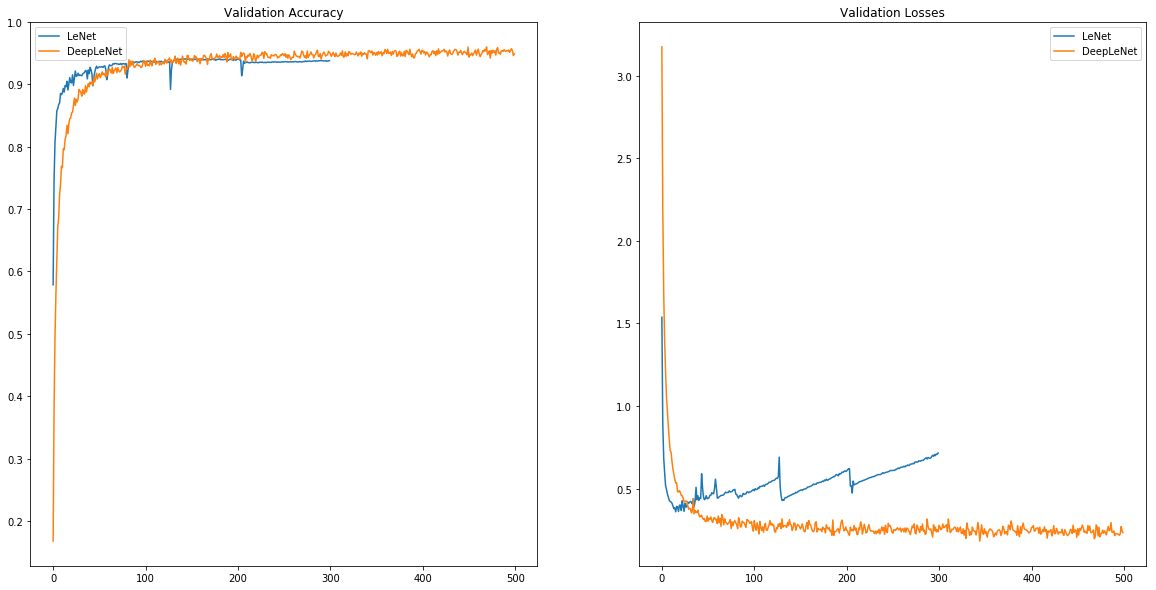

In [115]:
# Comparing performance of LeNet and DeepLeNet
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Validation Accuracy')
ax1.plot(validation_accuracy_LeNet,label = "LeNet")
ax1.plot(validation_accuracy_DeepLeNet,label = "DeepLeNet")
ax1.legend()
ax2.set_title('Validation Losses')
ax2.plot(validation_losses_LeNet,label = "LeNet")
ax2.plot(validation_losses_DeepLeNet,label = "DeepLeNet")
ax2.legend()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['test-signs/test1.JPG', 'test-signs/test3.JPG', 'test-signs/test4.JPG', 'test-signs/test5.JPG', 'test-signs/test7.JPG']


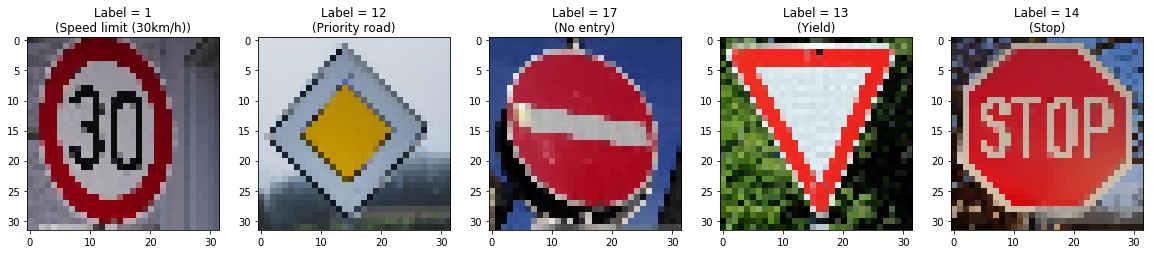

In [119]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import csv

#import sign names
with open("./signnames.csv") as f:
    f.readline() # skip the headers
    signnames = [row[1] for row in csv.reader(f)]

#import matplotlib.image as mpimg
im_dir = "test-signs/"
im_list = os.listdir(im_dir)
im_list_in = ['test-signs/test1.JPG', 'test-signs/test3.JPG', 'test-signs/test4.JPG', 'test-signs/test5.JPG', 'test-signs/test7.JPG']
print(im_list_in)
X_new = []
y_new = [1, 12, 17, 13, 14]

for i in range(len(im_list_in)):
    img = cv2.imread(im_list_in[i])
    img = cv2.resize(img, (32,32))
    img_rgb = np.copy(img)
    img_rgb[:,:,0] = img[:,:,2]
    img_rgb[:,:,2] = img[:,:,0]
    X_new.append(img_rgb)

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,10))
ax1.set_title('Label = ' + str(y_new[0]) + "\n(" + signnames[y_new[0]]+ ")")
ax1.imshow(X_new[0])
ax2.set_title('Label = ' + str(y_new[1]) + "\n(" + signnames[y_new[1]]+ ")")
ax2.imshow(X_new[1])
ax3.set_title('Label = ' + str(y_new[2]) + "\n(" + signnames[y_new[2]]+ ")")
ax3.imshow(X_new[2])
ax4.set_title('Label = ' + str(y_new[3]) + "\n(" + signnames[y_new[3]]+ ")")
ax4.imshow(X_new[3])
ax5.set_title('Label = ' + str(y_new[4]) + "\n(" + signnames[y_new[4]]+ ")")
ax5.imshow(X_new[4])

### Predict the Sign Type for Each Image

In [120]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_new_pp = np.copy(X_new)
X_new_pp = preprocess(X_new_pp)

Predictions: [ 1 12 17 13 14]


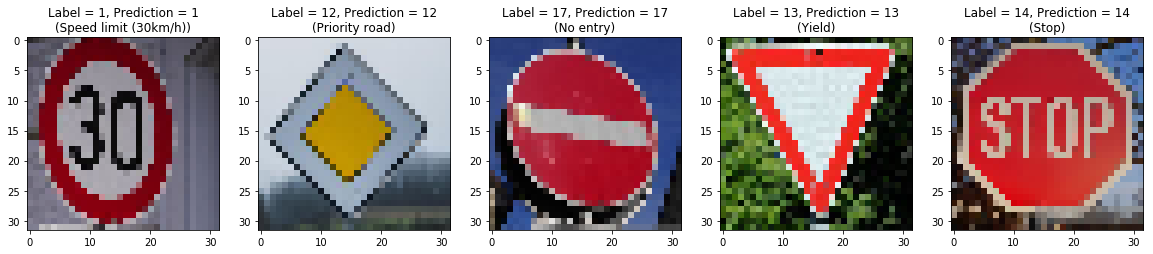

In [121]:
with tf.Session() as sess:
    saver.restore(sess, './deeplenet.ckpt')
    deeplenet_new_logits = sess.run(logits, feed_dict={x: X_new_pp})
    deeplenet_new_probs = sess.run(tf.nn.softmax(deeplenet_new_logits))
      
predictions = deeplenet_new_probs.argmax(axis=1)
print("Predictions: " + str(predictions))

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,10))
ax1.set_title('Label = ' + str(y_new[0]) + ", Prediction = " + str(predictions[0]) + "\n(" + signnames[y_new[0]]+ ")")
ax1.imshow(X_new[0])
ax2.set_title('Label = ' + str(y_new[1]) + ", Prediction = " + str(predictions[1]) + "\n(" + signnames[y_new[1]]+ ")")
ax2.imshow(X_new[1])
ax3.set_title('Label = ' + str(y_new[2]) + ", Prediction = " + str(predictions[2]) + "\n(" + signnames[y_new[2]]+ ")")
ax3.imshow(X_new[2])
ax4.set_title('Label = ' + str(y_new[3]) + ", Prediction = " + str(predictions[3]) + "\n(" + signnames[y_new[3]]+ ")")
ax4.imshow(X_new[3])
ax5.set_title('Label = ' + str(y_new[4]) + ", Prediction = " + str(predictions[4]) + "\n(" + signnames[y_new[4]]+ ")")
ax5.imshow(X_new[4])
    

### Analyze Performance

In [122]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, './deeplenet.ckpt')
    deeplenet_new_accuracy = evaluate(X_new_pp, y_new)
    
print("DeepLeNet accuracy on new images: " + str(deeplenet_new_accuracy))   

DeepLeNet accuracy on new images: 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([[  7.13634431e-01,   2.10089445e-01,   3.22267413e-02,
          2.86552422e-02,   1.28038228e-02],
       [  1.00000000e+00,   7.59407745e-11,   2.18782739e-12,
          1.69436812e-14,   2.41971987e-15],
       [  9.99999762e-01,   1.03011530e-07,   9.72748424e-08,
          2.13185955e-10,   1.48928869e-10],
       [  1.00000000e+00,   2.45576987e-17,   8.89458214e-18,
          1.63561380e-18,   1.62870270e-18],
       [  9.99094844e-01,   7.65045057e-04,   5.30499856e-05,
          3.13553028e-05,   1.92457246e-05]], dtype=float32), indices=array([[ 1,  4, 14,  8, 39],
       [12, 13, 35, 17, 36],
       [17, 14, 33,  9, 16],
       [13,  3,  5, 25, 12],
       [14, 33, 17, 13,  8]], dtype=int32))


<BarContainer object of 5 artists>

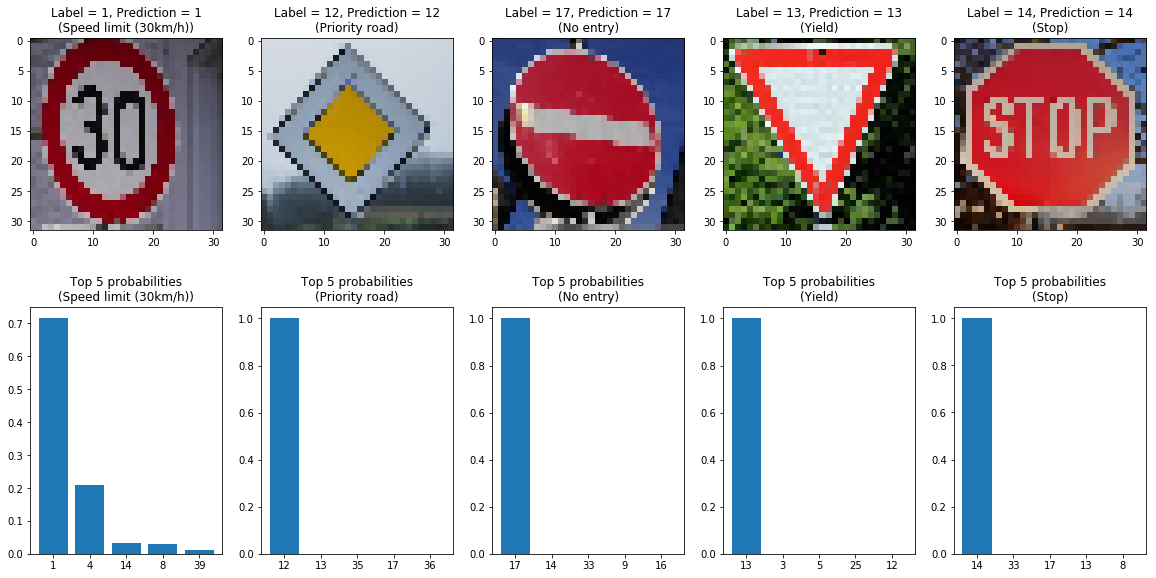

In [123]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    deeplenet_top5 = sess.run(tf.nn.top_k(tf.constant(deeplenet_new_probs), k=5))
    
print(deeplenet_top5)

f, ((ax1, ax2, ax3, ax4, ax5),(ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20,10))
ax1.set_title('Label = ' + str(y_new[0]) + ", Prediction = " + str(predictions[0]) + "\n(" + signnames[y_new[0]]+ ")")
ax1.imshow(X_new[0])
ax2.set_title('Label = ' + str(y_new[1]) + ", Prediction = " + str(predictions[1]) + "\n(" + signnames[y_new[1]]+ ")")
ax2.imshow(X_new[1])
ax3.set_title('Label = ' + str(y_new[2]) + ", Prediction = " + str(predictions[2]) + "\n(" + signnames[y_new[2]]+ ")")
ax3.imshow(X_new[2])
ax4.set_title('Label = ' + str(y_new[3]) + ", Prediction = " + str(predictions[3]) + "\n(" + signnames[y_new[3]]+ ")")
ax4.imshow(X_new[3])
ax5.set_title('Label = ' + str(y_new[4]) + ", Prediction = " + str(predictions[4]) + "\n(" + signnames[y_new[4]]+ ")")
ax5.imshow(X_new[4])
ax6.set_title('Top 5 probabilities' + "\n(" + signnames[y_new[0]]+ ")")
ax6.bar([str(value) for value in deeplenet_top5.indices[0]],deeplenet_top5.values[0])
ax7.set_title('Top 5 probabilities' + "\n(" + signnames[y_new[1]]+ ")")
ax7.bar([str(value) for value in deeplenet_top5.indices[1]],deeplenet_top5.values[1])
ax8.set_title('Top 5 probabilities' + "\n(" + signnames[y_new[2]]+ ")")
ax8.bar([str(value) for value in deeplenet_top5.indices[2]],deeplenet_top5.values[2])
ax9.set_title('Top 5 probabilities' + "\n(" + signnames[y_new[3]]+ ")")
ax9.bar([str(value) for value in deeplenet_top5.indices[3]],deeplenet_top5.values[3])
ax10.set_title('Top 5 probabilities' + "\n(" + signnames[y_new[4]]+ ")")
ax10.bar([str(value) for value in deeplenet_top5.indices[4]],deeplenet_top5.values[4])

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")